In [127]:
### importation of important libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [31]:
cancer_data = pd.read_csv('Breast_cancer_data.csv')
cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Exploradata analysis

In [32]:
cancer_data.shape

(569, 6)

In [33]:
cancer_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [34]:
cancer_data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [35]:
cancer_data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [36]:
cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [37]:
cancer_data['diagnosis'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

## Visualiations

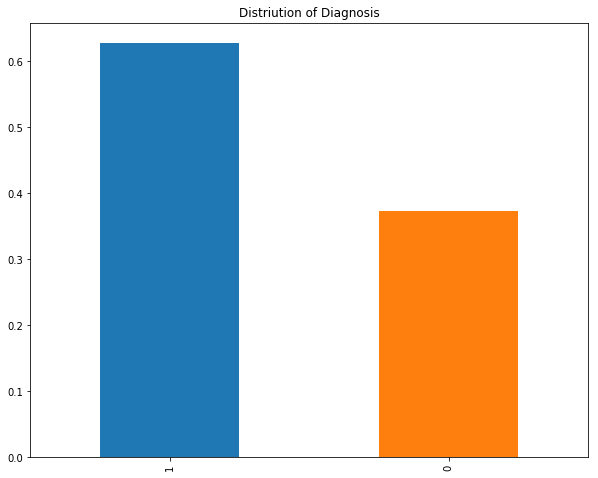

In [38]:
cancer_data['diagnosis'].value_counts(normalize=True).plot.bar(figsize=(10, 8), title = 'Distriution of Diagnosis')

## Distribution of univariate data


In [39]:
features = cancer_data.drop('diagnosis', 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C210665748>,
      dtype=object)

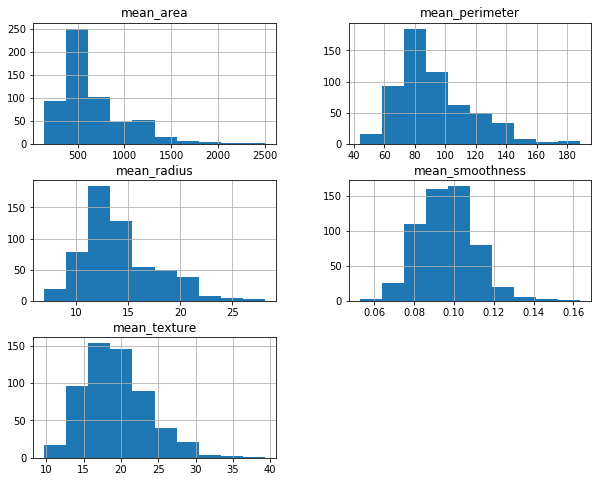

In [40]:
features.hist(figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C207E6DCC0>,
      dtype=object)

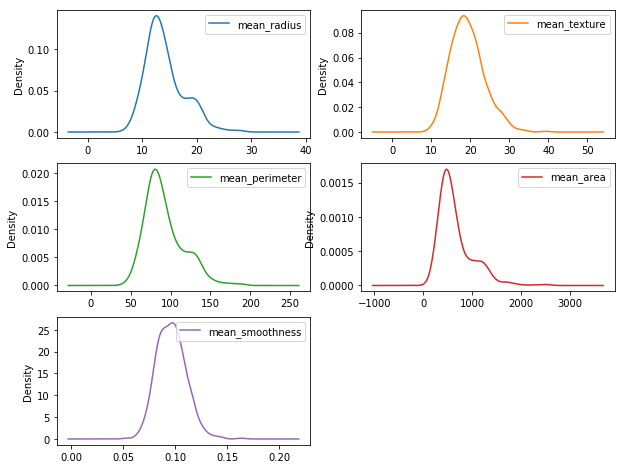

In [41]:
features.plot(kind='density', layout =(3,2), subplots=True, sharex=False, figsize = (10, 8))

## visualizing scatter plots using box plots

mean_radius           AxesSubplot(0.125,0.657941;0.352273x0.222059)
mean_texture       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
mean_perimeter        AxesSubplot(0.125,0.391471;0.352273x0.222059)
mean_area          AxesSubplot(0.547727,0.391471;0.352273x0.222059)
mean_smoothness          AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

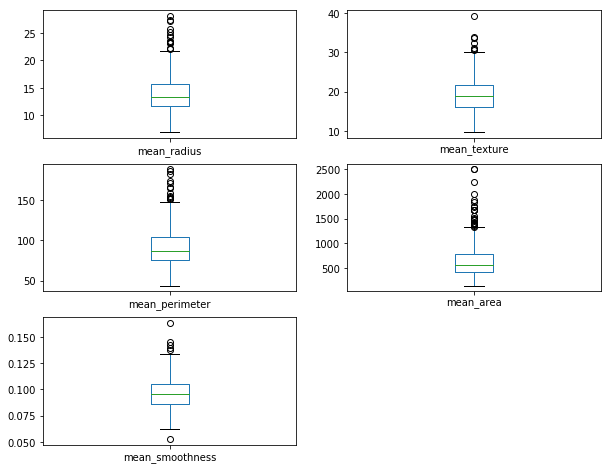

In [42]:
features.plot(kind='box', layout =(3,2), subplots=True, sharex=False, figsize = (10, 8))

## removing outliers using Z score

In [43]:
from scipy import stats


In [79]:
z = np.abs(stats.zscore(cancer_data))
print(z)

[[1.09706398 2.07333501 1.26993369 0.9843749  1.56846633 1.29767572]
 [1.82982061 0.35363241 1.68595471 1.90870825 0.82696245 1.29767572]
 [1.57988811 0.45618695 1.56650313 1.55888363 0.94221044 1.29767572]
 ...
 [0.70228425 2.0455738  0.67267578 0.57795264 0.84048388 1.29767572]
 [1.83834103 2.33645719 1.98252415 1.73521799 1.52576706 1.29767572]
 [1.80840125 1.22179204 1.81438851 1.34778924 3.11208479 0.77060855]]


In [80]:
threshold = 3
print(np.where(z>3))

(array([  3,  82,  82,  82, 105, 122, 122, 122, 180, 180, 180, 212, 212,
       212, 219, 232, 239, 259, 339, 352, 352, 352, 461, 461, 461, 504,
       521, 521, 568], dtype=int64), array([4, 0, 2, 3, 4, 2, 3, 4, 0, 2, 3, 0, 2, 3, 1, 1, 1, 1, 3, 0, 2, 3,
       0, 2, 3, 4, 2, 3, 4], dtype=int64))


In [81]:
features_no_outlier = cancer_data[(z<2).all(axis=1)]

In [82]:
features_no_outlier.shape

(501, 6)

mean_radius           AxesSubplot(0.125,0.657941;0.352273x0.222059)
mean_texture       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
mean_perimeter        AxesSubplot(0.125,0.391471;0.352273x0.222059)
mean_area          AxesSubplot(0.547727,0.391471;0.352273x0.222059)
mean_smoothness          AxesSubplot(0.125,0.125;0.352273x0.222059)
diagnosis             AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

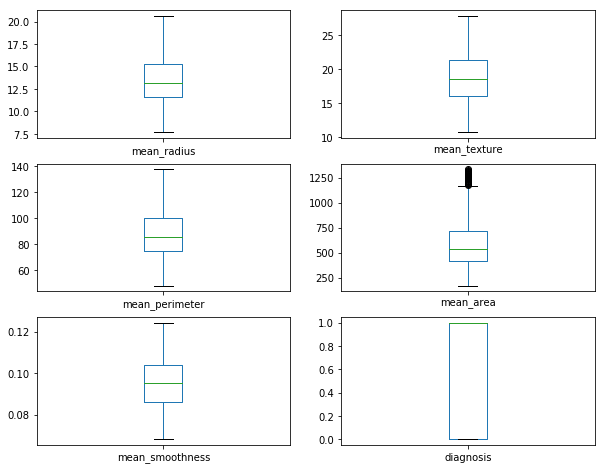

In [83]:
features_no_outlier.plot(kind='box', layout =(3,2), subplots=True, sharex=False, figsize = (10, 8))

## multivariate data analysis

In [84]:
from pandas.tools.plotting import scatter_matrix

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C20DD1AD68>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

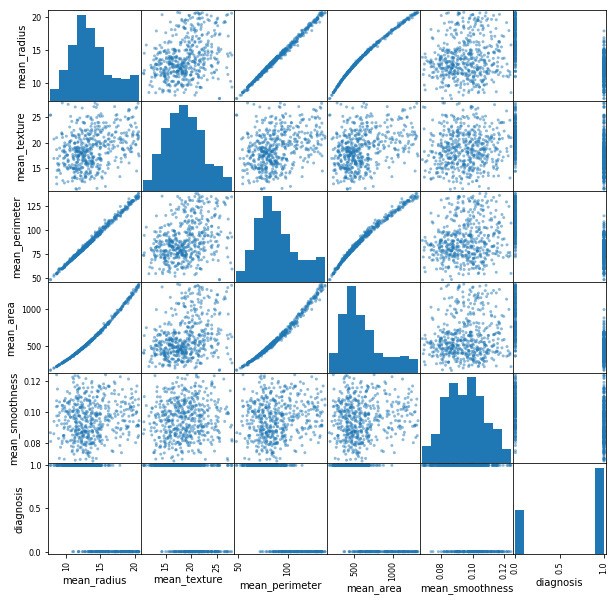

In [85]:
fig = plt.figure(figsize = (10, 10))
scatter_matrix(features_no_outlier, figsize = (10, 10))

## correlation matrix

In [86]:
matrix = features_no_outlier.corr()

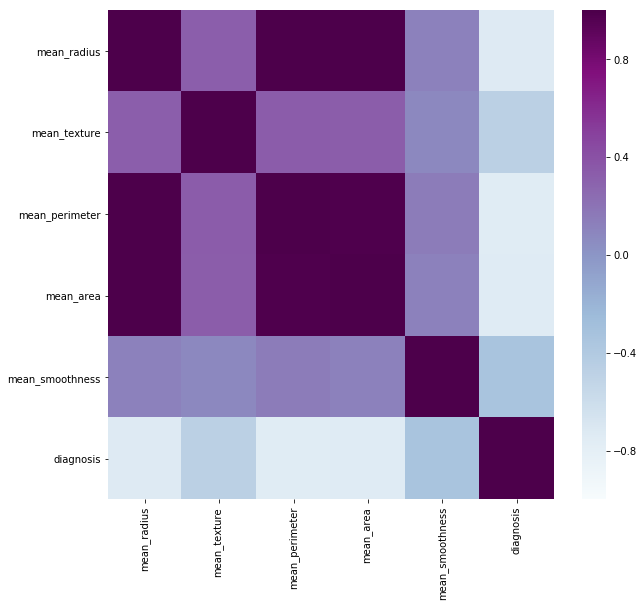

In [87]:
fig = plt.figure(figsize = (10, 9))
sn.heatmap(matrix, vmax=1, vmin=-1, cmap='BuPu')

In [88]:
features_no_outlier.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,13.713621,18.770559,89.028563,607.650699,0.095463,0.664671
std,2.956605,3.612943,20.199364,271.503439,0.012269,0.472577
min,7.691000,10.720000,47.980000,170.400000,0.068280,0.000000
25%,11.620000,16.070000,74.520000,412.600000,0.086370,0.000000
50%,13.170000,18.590000,85.240000,537.300000,0.095160,1.000000
75%,15.270000,21.310000,100.200000,716.600000,0.104200,1.000000
max,20.640000,27.880000,137.800000,1335.000000,0.124300,1.000000


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


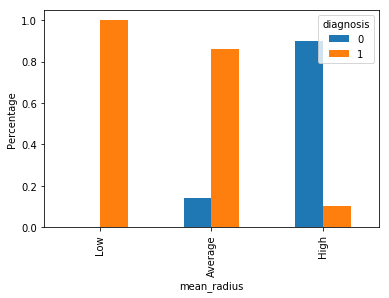

In [91]:
bins=[0,10,15,20] 
group=['Low','Average','High'] 
features_no_outlier['mean_radius_bin']=pd.cut(features_no_outlier['mean_radius'],bins,labels=group)

mean_radius_bin=pd.crosstab(features_no_outlier['mean_radius_bin'],features_no_outlier['diagnosis']) 
mean_radius_bin.div(mean_radius_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_radius') 
P = plt.ylabel('Percentage')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


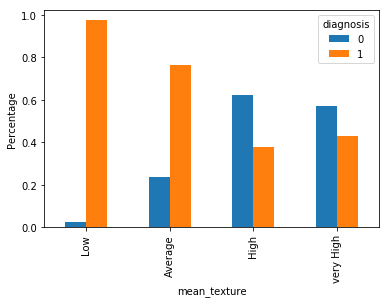

In [92]:
bins=[0,15,20,25, 30] 
group=['Low','Average','High', 'very High'] 
features_no_outlier['mean_texture_bin']=pd.cut(features_no_outlier['mean_texture'],bins,labels=group)

mean_texture_bin=pd.crosstab(features_no_outlier['mean_texture_bin'],features_no_outlier['diagnosis']) 
mean_texture_bin.div(mean_texture_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_texture') 
P = plt.ylabel('Percentage')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


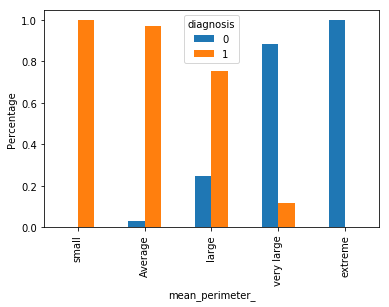

In [93]:
bins=[0,60,80,100, 120, 140] 
group=['small','Average','large','very large', 'extreme'] 
features_no_outlier['mean_perimeter_bin']=pd.cut(features_no_outlier['mean_perimeter'],bins,labels=group)

mean_perimeter_bin=pd.crosstab(features_no_outlier['mean_perimeter_bin'],features_no_outlier['diagnosis']) 
mean_perimeter_bin.div(mean_perimeter_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_perimeter_') 
P = plt.ylabel('Percentage')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


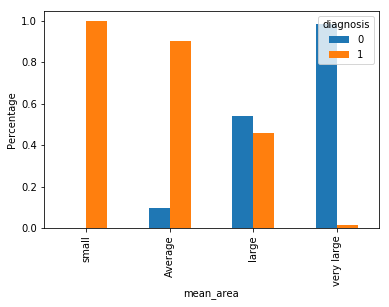

In [94]:
bins=[0,300,600,900, 1200] 
group=['small','Average','large','very large'] 
features_no_outlier['mean_area_bin']=pd.cut(features_no_outlier['mean_area'],bins,labels=group)

mean_area_bin=pd.crosstab(features_no_outlier['mean_area_bin'],features_no_outlier['diagnosis']) 
mean_area_bin.div(mean_area_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_area') 
P = plt.ylabel('Percentage')

In [120]:
features_no_outlier = features_no_outlier.drop(['mean_radius_bin','mean_perimeter_bin','mean_texture_bin', 'mean_area_bin'], axis=1)

# Model Building

### feature selection


In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [122]:
# create feature union
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=3)))
feature_union = FeatureUnion(features)

In [123]:
X = features_no_outlier.drop('diagnosis', 1)
y = features_no_outlier.diagnosis

## create a pipeline

In [124]:
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('lr', LogisticRegression()))


In [125]:
model = Pipeline(estimators)

In [128]:
kfold = KFold(n_splits=5, random_state=12)
results = cross_val_score(model, X, y, cv=kfold)
print(results)

[0.82178218 0.88       0.94       0.95       0.9       ]


In [129]:
print(results.mean())

0.8983564356435645


In [130]:
estimators2 = []
estimators2.append(('feature_union', feature_union))
estimators2.append(('lr', SVC()))


In [131]:
model2 = Pipeline(estimators2)
results2 = cross_val_score(model2, X, y, cv=kfold)
print(results2.mean())

0.6751287128712872


In [132]:
estimators3 = []
estimators3.append(('feature_union', feature_union))
estimators3.append(('lr', KNeighborsClassifier()))
model3 = Pipeline(estimators3)
results3 = cross_val_score(model3, X, y, cv=kfold)
print(results3.mean())

0.8704554455445545


In [133]:
estimators4 = []
estimators4.append(('feature_union', feature_union))
estimators4.append(('lr', DecisionTreeClassifier()))
model4 = Pipeline(estimators4)
results4 = cross_val_score(model4, X, y, cv=kfold)
print(results4.mean())

0.8664158415841584


In [134]:
estimators5 = []
estimators5.append(('feature_union', feature_union))
estimators5.append(('lr', GaussianNB()))
model5 = Pipeline(estimators5)
results5 = cross_val_score(model5, X, y, cv=kfold)
print(results5.mean())

0.8644158415841584


In [135]:
estimators6 = []
estimators6.append(('feature_union', feature_union))
estimators6.append(('lr', LinearDiscriminantAnalysis()))
model6 = Pipeline(estimators6)
results6 = cross_val_score(model6, X, y, cv=kfold)
print(results6.mean())

0.8884356435643564


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
estimators7 = []
estimators7.append(('feature_union', feature_union))
estimators7.append(('lr', RandomForestClassifier()))
model7 = Pipeline(estimators7)
results7 = cross_val_score(model7, X, y, cv=kfold)
print(results7.mean())

0.8804158415841584


In [139]:
estimators8 = []
estimators8.append(('feature_union', feature_union))
estimators8.append(('lr', AdaBoostClassifier()))
model8 = Pipeline(estimators8)
results8 = cross_val_score(model8, X, y, cv=kfold)
print(results8.mean())

0.8824554455445544


In [142]:
estimators9 = []
estimators9.append(('feature_union', feature_union))
estimators9.append(('lr', GradientBoostingClassifier()))
model9 = Pipeline(estimators9)
results9 = cross_val_score(model9, X, y, cv=kfold)
print(results9.mean())

0.8924158415841583


In [160]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logit = LogisticRegression().fit(X_train, y_train)
print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.8906666666666667
0.9523809523809523


In [153]:
predicted = logit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[41,  4],
       [ 2, 79]], dtype=int64)

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)

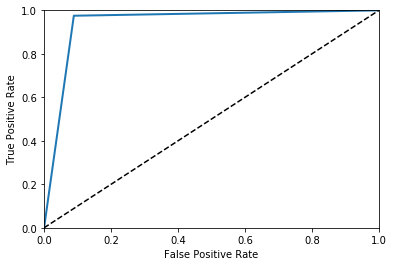

In [157]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [161]:
roc_auc_score(y_test, predicted)

0.9432098765432098